In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
df = pd.read_csv('/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')

In [4]:
air = df.copy()
air.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [5]:
air.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
air['name'].value_counts()

Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Private Room                                          11
                                                      ..
Rent in beautiful Sunnyside Gardens for holidays       1
East Village Designer's 1-BR APT                       1
2 bdrm in center of Williamsburg                       1
Penthouse studio- clean, A+ location. Park&Cafe :)     1
Private basement studio in Greenpoint                  1
Name: name, Length: 47905, dtype: int64

We will remove host_name since

We can see that 'last_review' and 'reviews_per_month' have 10052 missing values, that is 20% of the length.We will replace the missing values.
Also, we don't need and host_name since we are not supposed to share someone's personnel details.

We will remove the column 'id' too.

In [7]:
air.drop(['id','host_name'], axis= 1, inplace= True)
air.head()

name  host_id  \
0                Clean & quiet apt home by the park     2787   
1                             Skylit Midtown Castle     2845   
2               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3                   Cozy Entire Floor of Brownstone     4869   
4  Entire Apt: Spacious Studio/Loft by central park     7192   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  2018-10-19               0.21   
1    225               1                 45  2019-05-21               0.38   
2    150               3                  0         NaN                NaN   
3     89               1                270  2019-07-05               4.64   
4     80              10                  9  2018-11-19               0.10   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

In [8]:
air['number_of_reviews'].value_counts()

0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
404        1
436        1
388        1
341        1
607        1
Name: number_of_reviews, Length: 394, dtype: int64

Convert 'last_review' to datetime.

In [9]:
air['last_review'] = pd.to_datetime(air['last_review'])

In [10]:
air.dropna(subset=['name'], axis=0, inplace= True)

In [11]:
air.interpolate(inplace=True)

In [12]:
air['neighbourhood_group'].value_counts()

Manhattan        21652
Brooklyn         20098
Queens            5666
Bronx             1090
Staten Island      373
Name: neighbourhood_group, dtype: int64

Above, we can see that most of the hotels are available in Manhattan while Staten Island have least.

### Top 50 neighbourhoods where most Airbnb hotels are available.

In [13]:
ds = air['neighbourhood'].value_counts().reset_index()
ds.columns = ['Neighbourhood', 'count']
fig = px.bar(
    ds.head(50), 
    x='Neighbourhood', 
    y="count", 
    orientation='v', 
    title='Counts of Airbnb in neighbourhoods', 
    width=800,
    height=600
)
fig.show()

In [14]:
ds = air['minimum_nights'].value_counts().reset_index()
ds.columns = ['Nights spent', 'count']
fig = px.bar(
    ds.head(10), 
    x='Nights spent', 
    y="count", 
    orientation='v', 
    title='Minimum Nights spent', 
    width=800,
    height=600
)
fig.show()

Above we can see, most of the times, people have booked for 1 day, followed by 2 days and 3 days. Then there is sharp drop in '4 days' booking. Also, we can notice that a little less than 4k people have booked Airbnb for 30 days. We can assume that these people have come for some work and have booked the room for a month.

In [15]:
import plotly.graph_objects as go
#df = px.data.tips()
dfg = air.groupby('neighbourhood_group', as_index=False)['price'].mean()
fig = px.bar(dfg, x='neighbourhood_group', y='price',
                 labels={
                     'neighbourhood_group': "Neighbourhoods",
                     'price': "Price",
                 },
                title="Average price neighbourhood wise")
fig.show()

In [16]:
air.head()

name  host_id  \
0                Clean & quiet apt home by the park     2787   
1                             Skylit Midtown Castle     2845   
2               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3                   Cozy Entire Floor of Brownstone     4869   
4  Entire Apt: Spacious Studio/Loft by central park     7192   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  2018-10-19               0.21   
1    225               1                 45  2019-05-21               0.38   
2    150               3                  0         NaT               2.51   
3     89               1                270  2019-07-05               4.64   
4     80              10                  9  2018-11-19               0.10   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

In [17]:
dfg = air.groupby('room_type', as_index=False)['price'].mean()
fig = px.bar(dfg, x='room_type', y='price',
                 labels={
                     'room_type': "Room Type",
                     'price': "Price",
                 },
                title="Average price for room type")
fig.show()

In [18]:
import plotly.express as px
fig = px.scatter(air, x='longitude', y='latitude',
              color='neighbourhood_group')
fig.show()

In [19]:
import plotly.express as px
fig = px.scatter(air, x='room_type', y='price', color='neighbourhood_group',
                 labels={
                     'room_type': "Room Type",
                     'price': "Price",
                 },
                title="Price for room type in different neighbourhood group")
fig.show()

In [20]:
fig = px.scatter_3d(air, x='price', y='number_of_reviews', z='neighbourhood_group',
              color='neighbourhood_group')
fig.show()

In [21]:
import plotly.express as px
fig = px.scatter(air, x='room_type', y='reviews_per_month', color='neighbourhood_group',
                 labels={
                     'room_type': "Room Type",
                     'reviews_per_month': "Price",
                 },
                title="Price for room type in different neighbourhood group")
fig.show()

In [22]:
import plotly.express as px
fig = px.scatter(air, x='price', y='reviews_per_month', color='neighbourhood_group',
                 labels={
                     'price': "Price",
                     'reviews_per_month': "Reviews per month",
                 },
                title="Price vs reviews per month")
fig.show()

In [23]:
air.isnull().sum()

name                                  0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10042
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

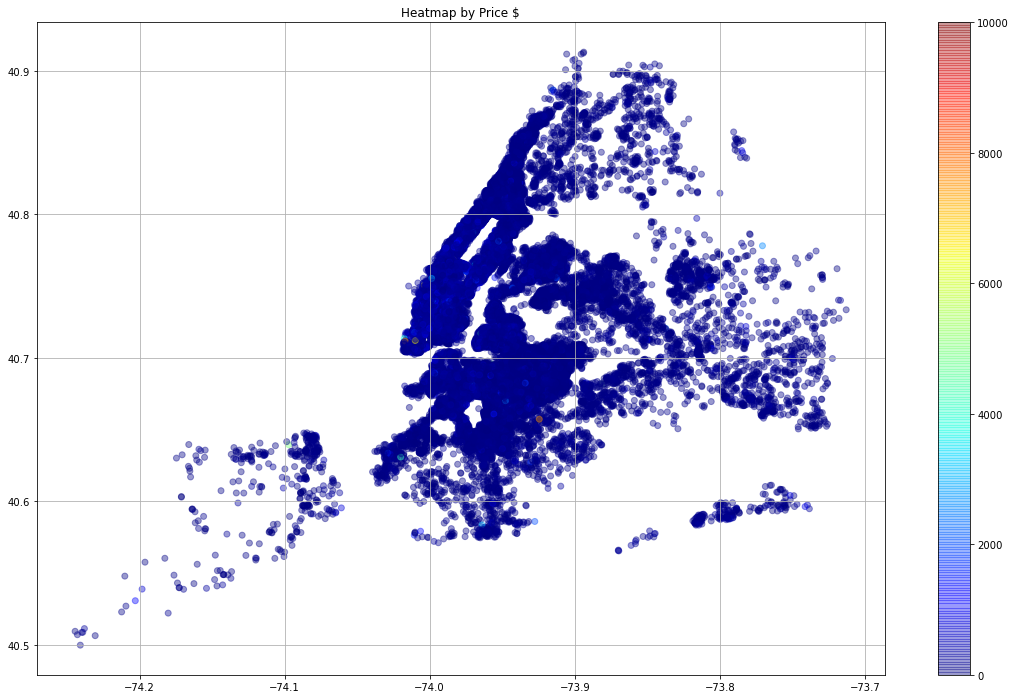

In [24]:
fig, ax = plt.subplots(figsize=(19, 12))


price_heatmap = ax.scatter(air.longitude, air.latitude, label='airbnb', c=air.price, 
                            cmap=plt.get_cmap('jet'), alpha=0.4)

plt.title("Heatmap by Price $")
plt.colorbar(price_heatmap)
plt.grid(True)
plt.show()

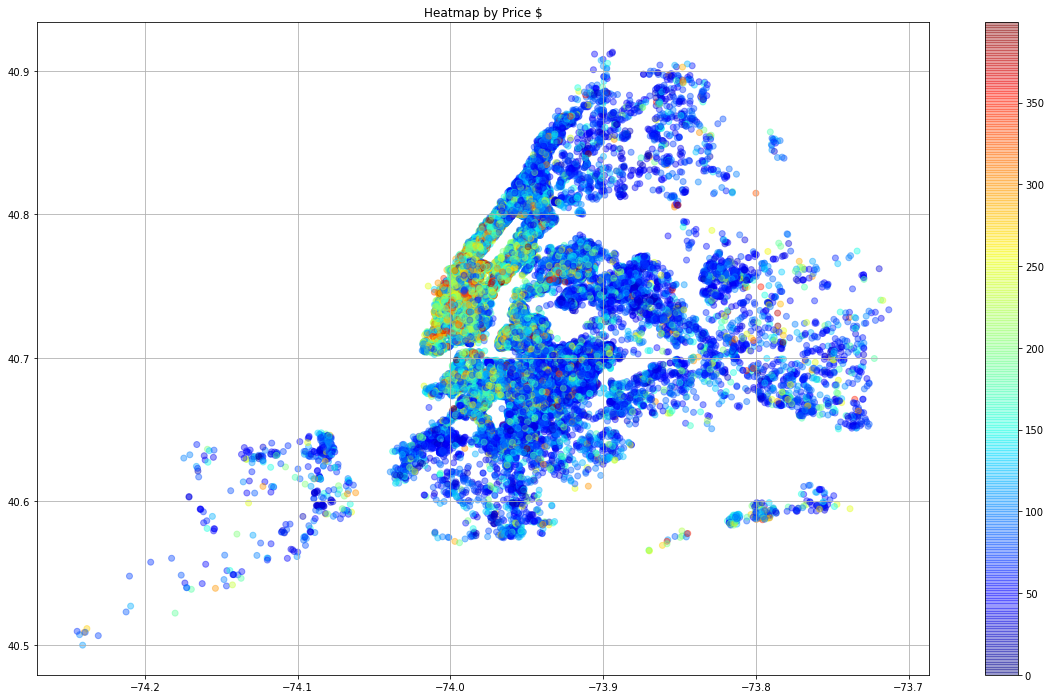

In [25]:
FILTER_PRICE_VALUE = 400 
sub_airbnb = air[air.price < FILTER_PRICE_VALUE]

# Draw Plot
fig, ax = plt.subplots(figsize=(20, 12))

cmap = plt.get_cmap('jet') # ColorMaps
c = sub_airbnb.price           # color, sequence, or sequence of color, optional
alpha = 0.5                # The alpha blending value, between 0 (transparent) and 1 (opaque).
label = "airbnb"
price_heatmap = ax.scatter(sub_airbnb.longitude, sub_airbnb.latitude, label=label, c=c, 
                            cmap=cmap, alpha=0.4)

plt.title("Heatmap by Price $")
plt.colorbar(price_heatmap)
plt.grid(True)
plt.show()

In [26]:
cscale = [
          [0.0, 'rgb(165,0,38)'], 
          [0.0005, 'rgb(215,48,39)'], 
          [0.007, 'rgb(250, 152, 122)'], 
          [0.08, 'rgb(208, 254, 144)'], 
          [0.1, 'rgb(0, 255, 179)'], 
          [0.3, 'rgb(171,217,233)'], 
          [0.7, 'rgb(116,173,209)'], 
          [0.9, 'rgb(69,117,180)'], 
          [1.0, 'rgb(49,54,149)']
         ]

In [27]:
fig = px.scatter_mapbox(air[air['price'] > 700], lat="latitude", lon="longitude",  color="price", size="reviews_per_month",
                  color_continuous_scale=cscale, height=760,size_max=20, zoom=10, title='Scatter map of most expensive Airbnb rents (>$700)')
fig.show(renderer='kaggle')

In [28]:
fig = px.scatter_mapbox(air, lat="latitude", lon="longitude",
                        color='price', size='reviews_per_month',
                        hover_name='price', hover_data=['number_of_reviews', 'reviews_per_month'],
                        color_discrete_sequence=["fuchsia"], size_max=20, zoom=10, height=300)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show(renderer='kaggle')